In [ ]:
import kagglehub
sayedgamal99_smoke_fire_detection_yolo_path = kagglehub.dataset_download('sayedgamal99/smoke-fire-detection-yolo')

print('Data source import complete.')

Data source import complete.


In [ ]:
!pip install -U ultralytics>=8.3.0
!pip install ruamel.yaml

In [ ]:
import os
import random
import shutil
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from ultralytics import YOLO
import ruamel.yaml
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')


In [ ]:
original_images_dir = "/kaggle/input/smoke-fire-detection-yolo/data/train/images"
original_labels_dir = "/kaggle/input/smoke-fire-detection-yolo/data/train/labels"

filtered_images_dir = "/kaggle/working/data/train/images"
filtered_labels_dir = "/kaggle/working/data/train/labels"

os.makedirs(filtered_images_dir, exist_ok=True)
os.makedirs(filtered_labels_dir, exist_ok=True)

class_images = defaultdict(list)

for label_file in os.listdir(original_labels_dir):
    label_path = os.path.join(original_labels_dir, label_file)
    with open(label_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            class_id = line.strip().split()[0]
            image_file = label_file.replace('.txt', '.jpg')
            class_images[class_id].append(image_file)
            break

for class_id, images in class_images.items():
    selected_images = random.sample(images, min(500, len(images)))
    for image_file in selected_images:
        src_img = os.path.join(original_images_dir, image_file)
        dst_img = os.path.join(filtered_images_dir, image_file)
        shutil.copyfile(src_img, dst_img)

        label_file = image_file.replace('.jpg', '.txt')
        src_lbl = os.path.join(original_labels_dir, label_file)
        dst_lbl = os.path.join(filtered_labels_dir, label_file)
        shutil.copyfile(src_lbl, dst_lbl)

In [ ]:
yaml = ruamel.yaml.YAML()
with open("/kaggle/input/smoke-fire-detection-yolo/data.yaml") as f:
    data = yaml.load(f)

data["path"] = "/kaggle/working/data"

with open("data1.yaml", "w") as f:
    yaml.dump(data, f)


100%|██████████| 5.35M/5.35M [00:00<00:00, 336MB/s]


Using image: /kaggle/working/data/train/images/WEB08928.jpg

image 1/1 /kaggle/working/data/train/images/WEB08928.jpg: 640x384 5 cars, 1 traffic light, 66.5ms
Speed: 13.7ms preprocess, 66.5ms inference, 351.5ms postprocess per image at shape (1, 3, 640, 384)


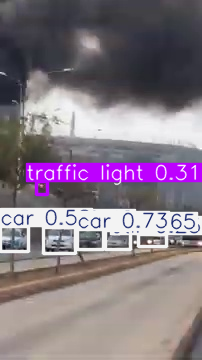

In [ ]:
model = YOLO("yolo11n.pt")

image_dir = "/kaggle/working/data/train/images"
image_files = os.listdir(image_dir)
sample_image = os.path.join(image_dir, random.choice(image_files))

print("Using image:", sample_image)

result = model.predict(source=sample_image, imgsz=640)

plot = result[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
shutil.copytree("/kaggle/input/smoke-fire-detection-yolo/data/val", "/kaggle/working/data/val", dirs_exist_ok=True)
shutil.copytree("/kaggle/input/smoke-fire-detection-yolo/data/test", "/kaggle/working/data/test", dirs_exist_ok=True)

'/kaggle/working/data/test'

In [ ]:
model.train(data="data1.yaml", epochs=100, imgsz=640, batch=16, lr0=0.01, dropout=0.15, device=0)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data1.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.15, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fal

100%|██████████| 755k/755k [00:00<00:00, 113MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,230 parameters, 2,590,214 gradients, 6.4 GFLOPs

Transferred 79/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2122.0±863.0 MB/s, size: 97.1 KB)


train: Scanning /kaggle/working/data/train/labels... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<00:00, 2202.36it/s]

train: /kaggle/working/data/train/images/WEB07271.jpg: corrupt JPEG restored and saved
train: New cache created: /kaggle/working/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 526.3±82.7 MB/s, size: 127.8 KB)


val: Scanning /kaggle/working/data/val/labels... 3099 images, 1375 backgrounds, 0 corrupt: 100%|██████████| 3099/3099 [00:01<00:00, 1746.17it/s]

val: /kaggle/working/data/val/images/WEB07535.jpg: corrupt JPEG restored and saved
val: /kaggle/working/data/val/images/WEB07536.jpg: corrupt JPEG restored and saved
val: /kaggle/working/data/val/images/WEB07539.jpg: corrupt JPEG restored and saved
val: /kaggle/working/data/val/images/WEB07542.jpg: corrupt JPEG restored and saved
val: /kaggle/working/data/val/images/WEB07561.jpg: corrupt JPEG restored and saved


val: New cache created: /kaggle/working/data/val/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.31G      2.734      3.332      2.391         32        640: 100%|██████████| 63/63 [00:21<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:26<00:00,  3.70it/s]


                   all       3099       3932      0.619      0.108     0.0627     0.0206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         3G      2.038      2.495      1.844         26        640: 100%|██████████| 63/63 [00:17<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:24<00:00,  3.99it/s]


                   all       3099       3932      0.334      0.312      0.224     0.0819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.01G      1.912      2.248      1.738         37        640: 100%|██████████| 63/63 [00:18<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:24<00:00,  3.91it/s]


                   all       3099       3932      0.388      0.382      0.301      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.03G      1.848      2.045      1.686         45        640: 100%|██████████| 63/63 [00:17<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.07it/s]


                   all       3099       3932      0.403      0.395      0.322      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.04G      1.758      1.933      1.609         19        640: 100%|██████████| 63/63 [00:17<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.12it/s]


                   all       3099       3932      0.406      0.341        0.3       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.04G      1.758      1.853      1.611         44        640: 100%|██████████| 63/63 [00:18<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.15it/s]


                   all       3099       3932      0.398      0.413      0.318      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.06G      1.723      1.758      1.566         41        640: 100%|██████████| 63/63 [00:17<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.11it/s]


                   all       3099       3932      0.452      0.438        0.4      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.07G      1.696      1.725      1.559         51        640: 100%|██████████| 63/63 [00:17<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.11it/s]


                   all       3099       3932      0.511      0.443       0.43      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.08G      1.677      1.696      1.557         31        640: 100%|██████████| 63/63 [00:18<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:24<00:00,  3.98it/s]


                   all       3099       3932       0.44      0.447      0.395      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.09G      1.635      1.612      1.515         38        640: 100%|██████████| 63/63 [00:17<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.15it/s]


                   all       3099       3932      0.517       0.48      0.452      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.11G       1.65      1.612      1.517         31        640: 100%|██████████| 63/63 [00:17<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.13it/s]


                   all       3099       3932      0.521      0.481      0.458       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.12G      1.634      1.603      1.497         46        640: 100%|██████████| 63/63 [00:18<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.31it/s]


                   all       3099       3932      0.523      0.498      0.482      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.14G      1.606      1.525      1.475         19        640: 100%|██████████| 63/63 [00:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.11it/s]


                   all       3099       3932      0.526      0.493      0.478      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.15G      1.609      1.543      1.488         42        640: 100%|██████████| 63/63 [00:17<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.15it/s]


                   all       3099       3932      0.561      0.482        0.5      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.17G      1.568      1.497      1.452         55        640: 100%|██████████| 63/63 [00:17<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.12it/s]


                   all       3099       3932      0.531      0.498       0.49      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.19G      1.548      1.456      1.452         51        640: 100%|██████████| 63/63 [00:19<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.10it/s]


                   all       3099       3932      0.539      0.492      0.485      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       3.2G      1.556      1.457       1.45         40        640: 100%|██████████| 63/63 [00:18<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.16it/s]


                   all       3099       3932      0.543      0.497      0.505      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       3.2G      1.547      1.416      1.444         55        640: 100%|██████████| 63/63 [00:17<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.17it/s]


                   all       3099       3932      0.536      0.495       0.49      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.23G      1.555      1.458      1.464         32        640: 100%|██████████| 63/63 [00:18<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.36it/s]


                   all       3099       3932      0.517      0.512      0.495      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.24G       1.53      1.421      1.429         41        640: 100%|██████████| 63/63 [00:18<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.11it/s]


                   all       3099       3932      0.553      0.523      0.516       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.26G      1.507      1.377      1.403         45        640: 100%|██████████| 63/63 [00:17<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.13it/s]


                   all       3099       3932      0.552      0.519      0.518       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.26G      1.507      1.377       1.41         34        640: 100%|██████████| 63/63 [00:17<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:24<00:00,  3.95it/s]


                   all       3099       3932       0.56      0.537      0.536      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.29G      1.461       1.35      1.386         41        640: 100%|██████████| 63/63 [00:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.13it/s]


                   all       3099       3932      0.539      0.517      0.487      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       3.3G      1.489      1.328      1.376         28        640: 100%|██████████| 63/63 [00:17<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.13it/s]


                   all       3099       3932      0.565      0.534      0.535      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.31G      1.454      1.297      1.356         33        640: 100%|██████████| 63/63 [00:17<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.10it/s]


                   all       3099       3932      0.523      0.514      0.497      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.33G      1.477      1.289      1.389         39        640: 100%|██████████| 63/63 [00:18<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.28it/s]


                   all       3099       3932      0.579      0.519      0.535      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.34G      1.454      1.315       1.38         44        640: 100%|██████████| 63/63 [00:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.10it/s]

                   all       3099       3932      0.585      0.544      0.551      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.36G      1.454      1.281      1.372         52        640: 100%|██████████| 63/63 [00:17<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:24<00:00,  3.96it/s]

                   all       3099       3932      0.552      0.502        0.5      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.37G      1.461      1.284      1.381         54        640: 100%|██████████| 63/63 [00:18<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.17it/s]


                   all       3099       3932      0.566      0.552      0.528      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.38G      1.415      1.255      1.354         48        640: 100%|██████████| 63/63 [00:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.19it/s]


                   all       3099       3932      0.562      0.522      0.536      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       3.4G      1.446      1.297      1.386         58        640: 100%|██████████| 63/63 [00:18<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.15it/s]


                   all       3099       3932      0.522      0.535      0.502      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.42G      1.404      1.212      1.357         44        640: 100%|██████████| 63/63 [00:17<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.14it/s]

                   all       3099       3932      0.575      0.546      0.546      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.43G      1.458      1.258      1.364         53        640: 100%|██████████| 63/63 [00:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.18it/s]


                   all       3099       3932      0.587       0.52      0.539      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.45G      1.401      1.203       1.35         32        640: 100%|██████████| 63/63 [00:18<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:24<00:00,  3.94it/s]

                   all       3099       3932      0.614      0.528      0.555      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.46G      1.393      1.202      1.333         31        640: 100%|██████████| 63/63 [00:17<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.16it/s]


                   all       3099       3932      0.576       0.53      0.541      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.48G      1.389      1.196      1.327         47        640: 100%|██████████| 63/63 [00:17<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.15it/s]


                   all       3099       3932      0.587       0.54      0.551      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.49G      1.393      1.199      1.342         36        640: 100%|██████████| 63/63 [00:18<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.23it/s]

                   all       3099       3932      0.579      0.525       0.54      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       3.5G      1.366      1.155      1.317         52        640: 100%|██████████| 63/63 [00:18<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.10it/s]


                   all       3099       3932      0.545      0.545      0.532      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.52G      1.386       1.16      1.327         28        640: 100%|██████████| 63/63 [00:17<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.18it/s]


                   all       3099       3932      0.599      0.528      0.555      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.54G      1.346       1.14      1.309         54        640: 100%|██████████| 63/63 [00:17<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.13it/s]


                   all       3099       3932      0.617      0.536      0.564      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.55G      1.378      1.153      1.313         23        640: 100%|██████████| 63/63 [00:19<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.32it/s]

                   all       3099       3932      0.606      0.548      0.569      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.56G      1.354       1.11        1.3         27        640: 100%|██████████| 63/63 [00:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.18it/s]

                   all       3099       3932      0.608       0.54      0.562      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.58G      1.321      1.138      1.294         45        640: 100%|██████████| 63/63 [00:17<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.13it/s]


                   all       3099       3932      0.595      0.544      0.561        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.59G      1.322      1.106      1.288         40        640: 100%|██████████| 63/63 [00:17<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.16it/s]


                   all       3099       3932       0.57      0.549       0.55      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.61G      1.362      1.123      1.311         45        640: 100%|██████████| 63/63 [00:19<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.34it/s]


                   all       3099       3932        0.6       0.53      0.552      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.62G      1.333      1.091      1.293         33        640: 100%|██████████| 63/63 [00:18<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.13it/s]


                   all       3099       3932      0.606      0.548      0.579      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.64G      1.302      1.083      1.283         36        640: 100%|██████████| 63/63 [00:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.16it/s]

                   all       3099       3932      0.592      0.532      0.561      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.65G      1.298      1.065      1.275         45        640: 100%|██████████| 63/63 [00:17<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.14it/s]

                   all       3099       3932      0.602      0.565      0.576        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.67G      1.306      1.047      1.288         49        640: 100%|██████████| 63/63 [00:18<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.31it/s]

                   all       3099       3932      0.596      0.547      0.564      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.67G      1.312      1.066      1.273         43        640: 100%|██████████| 63/63 [00:18<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.15it/s]


                   all       3099       3932      0.609      0.548      0.575      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       3.7G        1.3      1.038      1.269         54        640: 100%|██████████| 63/63 [00:17<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.15it/s]

                   all       3099       3932      0.636      0.545      0.585      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.71G       1.29      1.038      1.273         22        640: 100%|██████████| 63/63 [00:17<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.13it/s]

                   all       3099       3932      0.603      0.566      0.583      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.72G      1.279      1.028      1.258         31        640: 100%|██████████| 63/63 [00:19<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.37it/s]

                   all       3099       3932      0.588      0.542      0.562      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.73G      1.298      1.022      1.261         35        640: 100%|██████████| 63/63 [00:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.12it/s]


                   all       3099       3932      0.591      0.565      0.568      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.76G      1.317       1.04      1.271         33        640: 100%|██████████| 63/63 [00:17<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.15it/s]

                   all       3099       3932      0.638      0.529      0.576      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.77G      1.243     0.9737      1.222         34        640: 100%|██████████| 63/63 [00:17<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.14it/s]


                   all       3099       3932       0.62      0.554      0.581      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.78G      1.268     0.9894      1.252         31        640: 100%|██████████| 63/63 [00:17<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.24it/s]

                   all       3099       3932      0.616      0.557      0.575      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.79G      1.257     0.9913      1.239         37        640: 100%|██████████| 63/63 [00:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.20it/s]

                   all       3099       3932      0.606      0.561      0.577      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.81G      1.255     0.9658      1.238         37        640: 100%|██████████| 63/63 [00:17<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:24<00:00,  3.96it/s]


                   all       3099       3932      0.592      0.564      0.562      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.83G      1.235     0.9597      1.222         33        640: 100%|██████████| 63/63 [00:17<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.12it/s]

                   all       3099       3932      0.622      0.558      0.582       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.84G      1.258     0.9634      1.241         46        640: 100%|██████████| 63/63 [00:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.29it/s]


                   all       3099       3932      0.619      0.562      0.585      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.85G      1.232     0.9755      1.217         42        640: 100%|██████████| 63/63 [00:18<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.11it/s]

                   all       3099       3932      0.604      0.576      0.583      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.87G      1.243     0.9645       1.24         48        640: 100%|██████████| 63/63 [00:18<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.14it/s]


                   all       3099       3932      0.628       0.57      0.598       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.89G      1.223     0.9512      1.221         30        640: 100%|██████████| 63/63 [00:17<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.17it/s]


                   all       3099       3932      0.606       0.56      0.577      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       3.9G       1.21     0.9316      1.208         47        640: 100%|██████████| 63/63 [00:18<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.09it/s]


                   all       3099       3932      0.621      0.566      0.582      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.91G      1.189     0.9029       1.21         28        640: 100%|██████████| 63/63 [00:17<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.13it/s]

                   all       3099       3932      0.617      0.578      0.584      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.93G      1.208     0.9163      1.205         44        640: 100%|██████████| 63/63 [00:17<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.18it/s]


                   all       3099       3932      0.626      0.555      0.576      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.95G      1.223     0.9209      1.205         30        640: 100%|██████████| 63/63 [00:18<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.25it/s]


                   all       3099       3932      0.607      0.576      0.583      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.96G      1.202     0.8993      1.203         38        640: 100%|██████████| 63/63 [00:18<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.16it/s]


                   all       3099       3932      0.632      0.554      0.581      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.97G      1.209     0.9146      1.213         35        640: 100%|██████████| 63/63 [00:17<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.19it/s]

                   all       3099       3932      0.611      0.573      0.583       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.99G      1.194     0.8875      1.195         23        640: 100%|██████████| 63/63 [00:17<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:24<00:00,  4.02it/s]

                   all       3099       3932      0.611      0.584       0.58      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.01G      1.185     0.8815      1.188         42        640: 100%|██████████| 63/63 [00:18<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.28it/s]

                   all       3099       3932      0.614      0.576      0.593      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.02G       1.18     0.8819      1.186         38        640: 100%|██████████| 63/63 [00:17<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.19it/s]


                   all       3099       3932      0.633      0.574      0.597      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.03G      1.179     0.8788      1.183         32        640: 100%|██████████| 63/63 [00:17<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.21it/s]

                   all       3099       3932      0.634       0.57      0.595      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.05G       1.17     0.8799      1.189         39        640: 100%|██████████| 63/63 [00:17<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.27it/s]


                   all       3099       3932      0.626      0.575      0.597      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.06G      1.174     0.8811      1.185         32        640: 100%|██████████| 63/63 [00:18<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.29it/s]


                   all       3099       3932      0.614      0.566      0.582      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.08G      1.168     0.8741      1.179         34        640: 100%|██████████| 63/63 [00:17<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:24<00:00,  4.04it/s]


                   all       3099       3932      0.635      0.566      0.593      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.09G      1.166     0.8618      1.175         30        640: 100%|██████████| 63/63 [00:17<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.20it/s]


                   all       3099       3932      0.623      0.569      0.585      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.11G      1.167     0.8464      1.191         35        640: 100%|██████████| 63/63 [00:17<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.26it/s]

                   all       3099       3932      0.622      0.577      0.596      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.12G      1.145     0.8461      1.164         40        640: 100%|██████████| 63/63 [00:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.26it/s]

                   all       3099       3932       0.61      0.583      0.582      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.14G      1.125     0.8232      1.162         53        640: 100%|██████████| 63/63 [00:17<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.20it/s]

                   all       3099       3932      0.629      0.573      0.594      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.14G      1.154     0.8285      1.164         51        640: 100%|██████████| 63/63 [00:17<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.23it/s]


                   all       3099       3932       0.63      0.575      0.588      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.17G      1.126     0.8249      1.155         37        640: 100%|██████████| 63/63 [00:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.05it/s]


                   all       3099       3932      0.616      0.574      0.596      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.18G      1.112     0.8066      1.146         44        640: 100%|██████████| 63/63 [00:18<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.16it/s]

                   all       3099       3932      0.622      0.579      0.588       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       4.2G      1.124     0.8118      1.152         35        640: 100%|██████████| 63/63 [00:17<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.18it/s]

                   all       3099       3932      0.613      0.576      0.583      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       4.2G      1.129     0.8192      1.158         34        640: 100%|██████████| 63/63 [00:17<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.19it/s]


                   all       3099       3932      0.625      0.578      0.599      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.23G       1.12      0.816      1.148         38        640: 100%|██████████| 63/63 [00:18<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.35it/s]


                   all       3099       3932      0.634      0.573      0.596      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.24G       1.11     0.7928      1.146         57        640: 100%|██████████| 63/63 [00:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.27it/s]

                   all       3099       3932      0.636      0.581      0.603      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.26G      1.102     0.7796      1.148         32        640: 100%|██████████| 63/63 [00:17<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:24<00:00,  3.99it/s]

                   all       3099       3932      0.639      0.568      0.601      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.26G      1.118     0.8083      1.155         48        640: 100%|██████████| 63/63 [00:17<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.27it/s]


                   all       3099       3932       0.65      0.566      0.593      0.313
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.29G       1.15     0.8353      1.171         25        640: 100%|██████████| 63/63 [00:19<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.31it/s]

                   all       3099       3932      0.638      0.568      0.575      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       4.3G      1.088     0.7522      1.134         17        640: 100%|██████████| 63/63 [00:17<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.21it/s]


                   all       3099       3932      0.644      0.572      0.592      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.32G      1.093     0.7358      1.134         20        640: 100%|██████████| 63/63 [00:16<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.25it/s]

                   all       3099       3932      0.662      0.565      0.594      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.32G       1.08     0.7206      1.128         15        640: 100%|██████████| 63/63 [00:16<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.22it/s]


                   all       3099       3932      0.664      0.568      0.606       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.35G      1.079     0.7074      1.115         28        640: 100%|██████████| 63/63 [00:16<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:24<00:00,  4.01it/s]

                   all       3099       3932      0.645       0.58      0.601      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.36G      1.067     0.7161       1.11         18        640: 100%|██████████| 63/63 [00:17<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.34it/s]

                   all       3099       3932      0.644      0.579      0.599      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.38G      1.059     0.7182      1.109         28        640: 100%|██████████| 63/63 [00:17<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.22it/s]

                   all       3099       3932      0.654      0.568      0.598      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.38G      1.038     0.6815      1.096         15        640: 100%|██████████| 63/63 [00:16<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.19it/s]


                   all       3099       3932      0.663      0.571      0.596      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       4.4G      1.043     0.6844      1.112         17        640: 100%|██████████| 63/63 [00:16<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.24it/s]


                   all       3099       3932      0.651      0.567      0.594      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.42G      1.056     0.7022      1.108         12        640: 100%|██████████| 63/63 [00:16<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.24it/s]

                   all       3099       3932      0.657       0.57        0.6      0.317



100 epochs completed in 1.167 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:24<00:00,  3.90it/s]


                   all       3099       3932      0.665      0.567      0.606       0.32
                 smoke       1550       1756      0.675      0.634      0.643      0.354
                  fire        879       2176      0.655      0.499      0.569      0.285
Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7878f9caa450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

Using image: /kaggle/working/data/train/images/PublicDataset01003.jpg

image 1/1 /kaggle/working/data/train/images/PublicDataset01003.jpg: 480x640 4 fires, 48.4ms
Speed: 2.3ms preprocess, 48.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


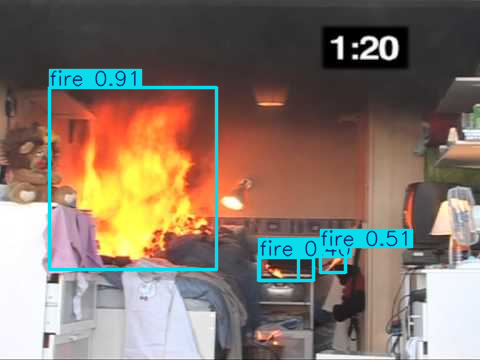

In [ ]:
from ultralytics import YOLO
import os, random, cv2
from PIL import Image
from IPython.display import display

# Load the trained model
model = YOLO("runs/detect/train2/weights/best.pt")

# Pick a random image from your filtered dataset
image_dir = "/kaggle/working/data/train/images"
image_files = os.listdir(image_dir)
sample_image = os.path.join(image_dir, random.choice(image_files))

print("Using image:", sample_image)

# Predict
result = model.predict(source=sample_image, imgsz=640)

# Show the result
plot = result[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


In [ ]:
import zipfile

zip_path = "/kaggle/working/best_model.zip"
model_path = "runs/detect/train2/weights/best.pt"

with zipfile.ZipFile(zip_path, 'w') as zipf:
    zipf.write(model_path, arcname="best.pt")


In [ ]:
from google.colab import files
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download(model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>